In [1]:
import csv
import datetime
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



def parse_time(text):
    return datetime.datetime.strptime(text, '%Y-%m-%d %H:%M:%S.%f')


def load_csv(filename):
    with open(filename, encoding='utf8') as f:
        return list(csv.reader(f, delimiter=','))


# id, task, variant, group, time

mesages = pd.read_csv('messages.csv',header = None, names = ["id", 'task', 'variant', 'group', 'time'])

# id, message_id, time, status
checks = pd.read_csv('checks.csv',header = None, names = ["id", 'message_id', 'time', 'status'])

# task, variant, group, time, status, achievements
statuses = pd.read_csv('statuses.csv' , header=None, names = ['task', 'variant', 'group', 'time', 'status', 
                                                              'achievements'])

In [2]:
mesages["time"] = mesages["time"].astype("datetime64[ns]")
checks['time'] = checks['time'].astype("datetime64[ns]")
statuses['time'] = statuses['time'].astype("datetime64[ns]")


# 3.1 Как по дням недели распределяется активность студентов?

/Users/egormatolygin/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:ylabel='count'>

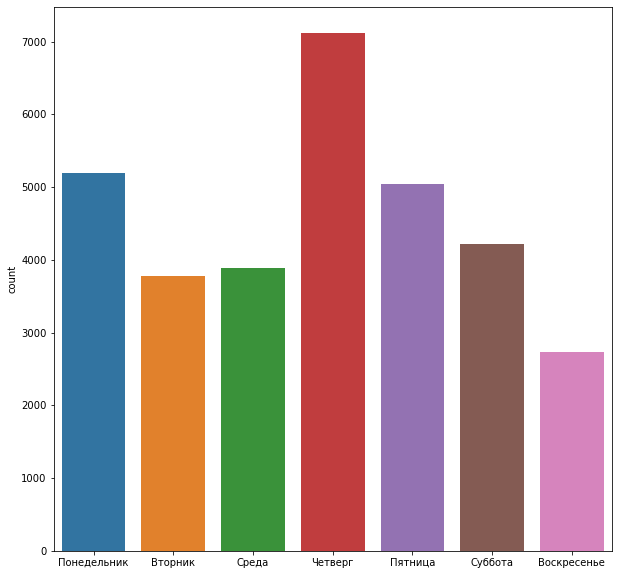

In [122]:
plt.figure(figsize = (10,10))
days = [datetime.datetime.weekday(mesages["time"].iloc[i]) for i in range(len(mesages))]
for i, day in enumerate(days):
    if day==0:
        days[i] = "Понедельник"
    elif day == 1:
        days[i] = "Вторник"
    elif day == 2:
        days[i] = "Среда"
    elif day == 3:
        days[i] = "Четверг"
    elif day == 4:
        days[i] = "Пятница"
    elif day == 5:
        days[i] = "Суббота"
    elif day == 6:
        days[i] = "Воскресенье"
sns.countplot(days, order = ["Понедельник","Вторник","Среда","Четверг","Пятница","Суббота","Воскресенье"])


# 3.2 Как по времени суток распределяется активность студентов?

/Users/egormatolygin/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:ylabel='count'>

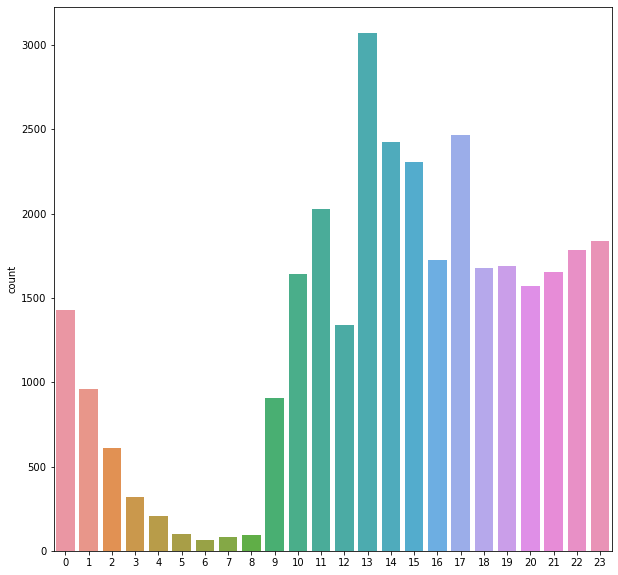

In [4]:
plt.figure(figsize = (10,10))
hours = [datetime.datetime.timetuple(mesages["time"].iloc[i])[3] for i in range(len(mesages))]
sns.countplot(hours)

# 3.3 Сколько сообщений в среднем студенты отправляют по каждой задаче?

<BarContainer object of 8 artists>

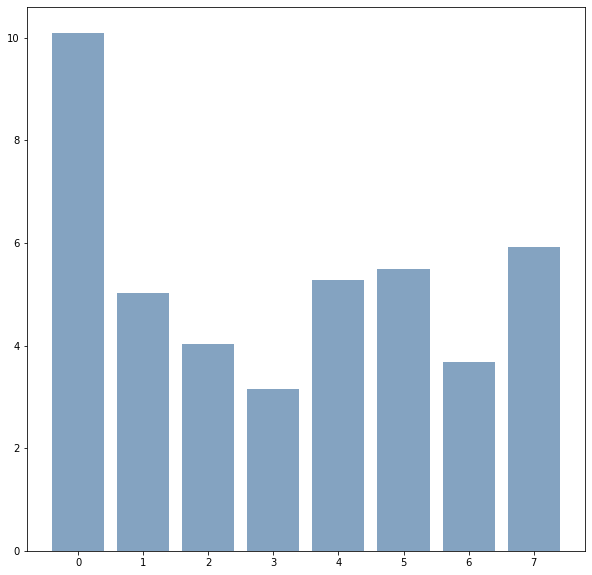

In [5]:
plt.figure(figsize = (10,10))
group = mesages.groupby(["task",'variant','group']).count()
avgtime = group.groupby("task")["id"].mean()
plt.bar(x = avgtime.index,height = avgtime, color=(0.2, 0.4, 0.6, 0.6))

# 3.4 Как за период с начала семестра менялась активность студентов по каждой из задач?

In [150]:
days = mesages.copy()
days["time"] = days["time"].dt.date

act = days.groupby(["task","time"]).count()
#act = pd.DataFrame(act)
act["task"] = [day[0] for day in act.index]
act["time"] = [day[1] for day in act.index]
act

id  variant  group  task        time
task time                                             
0    2023-02-08    2        2      2     0  2023-02-08
     2023-02-09  748      748    748     0  2023-02-09
     2023-02-10  926      926    926     0  2023-02-10
     2023-02-11  831      831    831     0  2023-02-11
     2023-02-12  596      596    596     0  2023-02-12
...              ...      ...    ...   ...         ...
7    2023-03-07  138      138    138     7  2023-03-07
     2023-03-08  216      216    216     7  2023-03-08
     2023-03-09  396      396    396     7  2023-03-09
     2023-03-10  141      141    141     7  2023-03-10
     2023-03-11    9        9      9     7  2023-03-11

[160 rows x 5 columns]

<Figure size 1080x360 with 0 Axes>

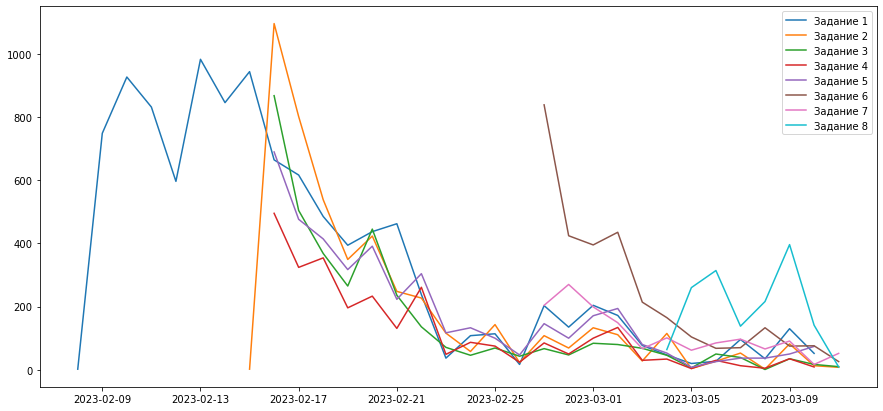

In [7]:
plt.figure(figsize=(15,5))
fig, ax = plt.subplots(figsize = (15,7))
ax.plot(act[act["task"]==0]["time"], act[act["task"]==0]["id"],c = "tab:blue")
ax.plot(act[act["task"]==1]["time"], act[act["task"]==1]["id"],c = 'tab:orange')
ax.plot(act[act["task"]==2]["time"], act[act["task"]==2]["id"],c = 'tab:green')
ax.plot(act[act["task"]==3]["time"], act[act["task"]==3]["id"],c = 'tab:red')
ax.plot(act[act["task"]==4]["time"], act[act["task"]==4]["id"],c = 'tab:purple')
ax.plot(act[act["task"]==5]["time"], act[act["task"]==5]["id"],c = 'tab:brown')
ax.plot(act[act["task"]==6]["time"], act[act["task"]==6]["id"],c = 'tab:pink' )
ax.plot(act[act["task"]==7]["time"], act[act["task"]==7]["id"],c = 'tab:cyan')

ax.legend(["Задание 1","Задание 2","Задание 3","Задание 4","Задание 5","Задание 6","Задание 7","Задание 8"])

# 3.5 В каких группах было отправлено больше всего сообщений?

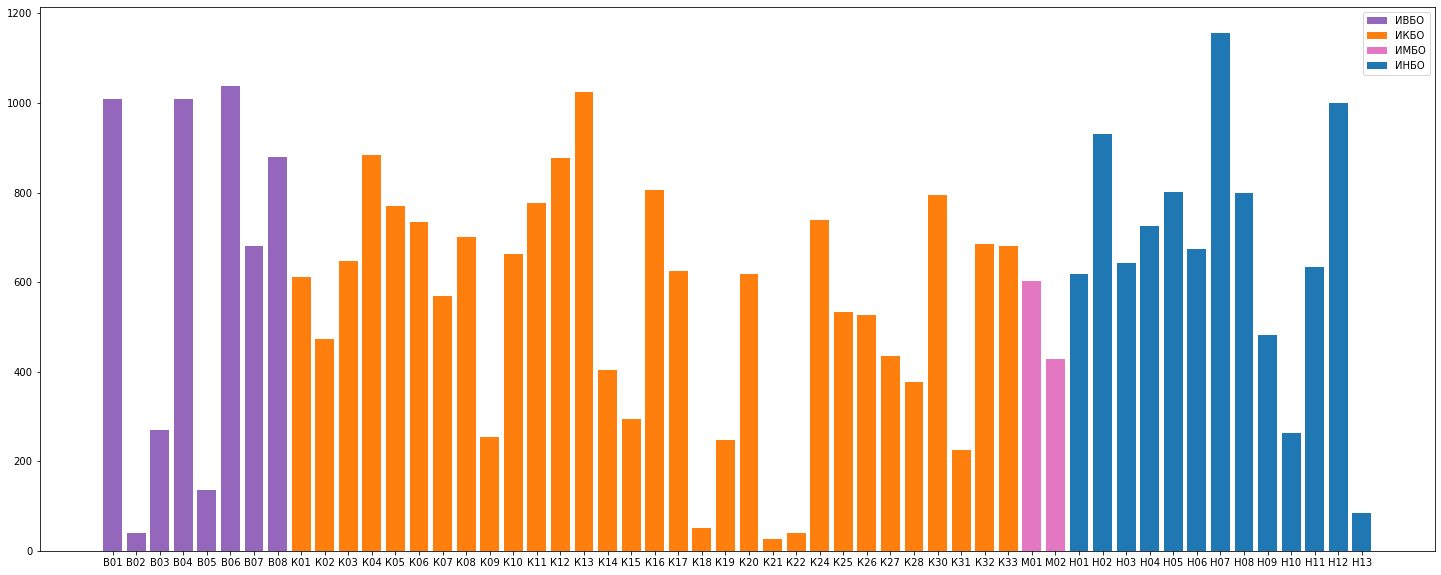

In [8]:
from matplotlib.patches import Patch

color = []
fig,ax = plt.subplots(figsize= (25,10))
group = mesages.groupby("group").count()
for cl in group.index:
    if cl[:4]=="ИВБО":
        color.append("tab:purple")
    elif cl[:4]=="ИКБО":
        color.append("tab:orange")
    elif cl[:4]=="ИМБО":
        color.append("tab:pink")
    else:
        color.append("tab:blue")
ax.bar([ind[1]+ind[5:7] for ind in group.index],group["id"],color = color)
legend_elements = [Patch(facecolor='tab:purple',label='ИВБО'),Patch(facecolor='tab:orange',label='ИКБО'),
                  Patch(facecolor='tab:pink',label='ИМБО'),Patch(facecolor='tab:blue',label='ИНБО')]
ax.legend(handles=legend_elements)

# 3.6 В каких группах было получено больше всего правильных решений?

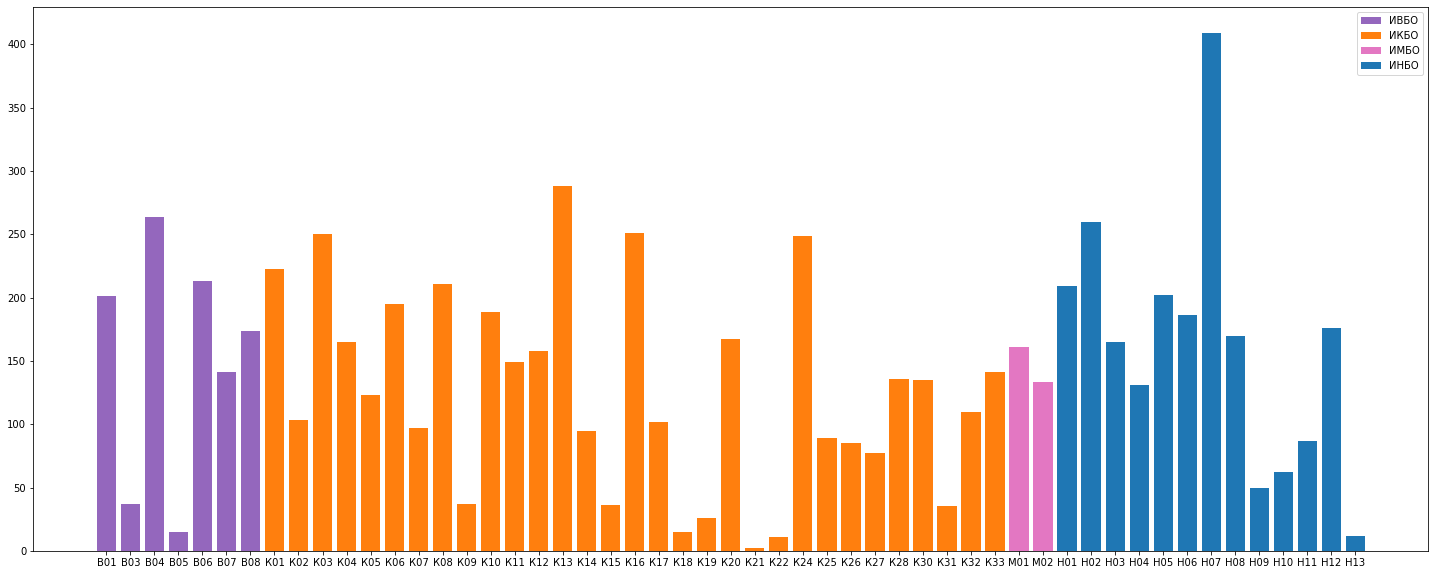

In [9]:
color = []
fig,ax = plt.subplots(figsize= (25,10))
df = checks.merge(mesages.rename(columns = {"id":"message_id"})[["group","message_id"]], how = 'left', on = "message_id")
group = df[df['status']==2].groupby("group").count()
group
for cl in group.index:
    if cl[:4]=="ИВБО":
        color.append("tab:purple")
    elif cl[:4]=="ИКБО":
        color.append("tab:orange")
    elif cl[:4]=="ИМБО":
        color.append("tab:pink")
    else:
        color.append("tab:blue")

ax.bar([ind[1]+ind[5:7] for ind in group.index],group["id"],color = color)
legend_elements = [Patch(facecolor='tab:purple',label='ИВБО'),Patch(facecolor='tab:orange',label='ИКБО'),
                  Patch(facecolor='tab:pink',label='ИМБО'),Patch(facecolor='tab:blue',label='ИНБО')]
ax.legend(handles=legend_elements)

# 3.7 Какие задачи оказались самыми легкими, самыми сложными?

In [146]:
df = checks.merge(mesages.rename(columns = {"id":"message_id"})[["task","message_id"]], how = 'left', on = "message_id")
group = df.groupby(["task",'status']).count()
group = group[["id"]]
group["task"]=  [ind[0] for ind in group.index]
group["status"]=  [ind[1] for ind in group.index]

In [147]:
group["diff"]=0
for task in group["task"].unique():
    correct = group[group["task"]==task].iloc[0,0]
    _all = group[group["task"]==task].iloc[0,0] + group[group["task"]==task].iloc[1,0] +\
              group[group["task"]==task].iloc[2,0]
    group.iloc[[task*3,task*3+1,task*3+2],3] = correct/_all
group

id  task  status      diff
task status                              
0    2       1556     0       2  0.146199
     3       8224     0       3  0.146199
     6        863     0       6  0.146199
1    2       1294     1       2  0.270938
     3       3255     1       3  0.270938
     6        227     1       6  0.270938
2    2        957     2       2  0.265833
     3       2555     2       3  0.265833
     6         88     2       6  0.265833
3    2       1286     3       2  0.466280
     3       1185     3       3  0.466280
     6        287     3       6  0.466280
4    2       1072     4       2  0.256031
     3       2798     4       3  0.256031
     6        317     4       6  0.256031
5    2        593     5       2  0.196163
     3       2278     5       3  0.196163
     6        152     5       6  0.196163
6    2        410     6       2  0.280822
     3        993     6       3  0.280822
     6         57     6       6  0.280822
7    2        240     7       2  0.156047
     3       1283     7       3  0.156047
     6         15     7       6  0.156047

<BarContainer object of 24 artists>

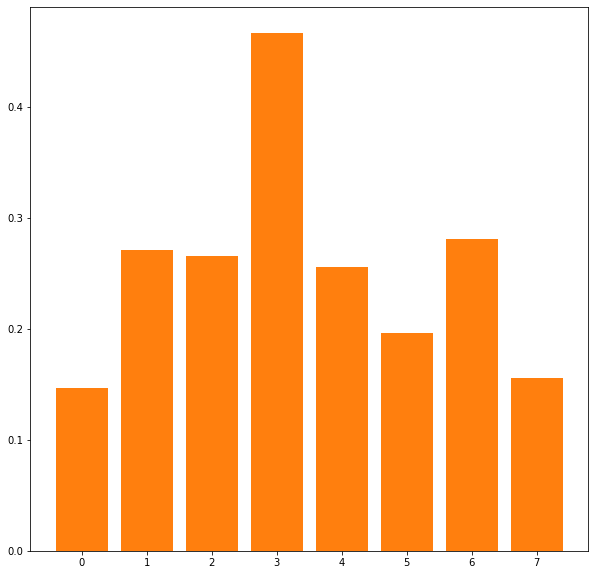

In [148]:
plt.figure(figsize = (10,10))
plt.bar(group["task"],group["diff"],color = "tab:orange")

# 3.8 Студенты каких групп заработали больше всего достижений?

/Users/egormatolygin/opt/anaconda3/lib/python3.9/site-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


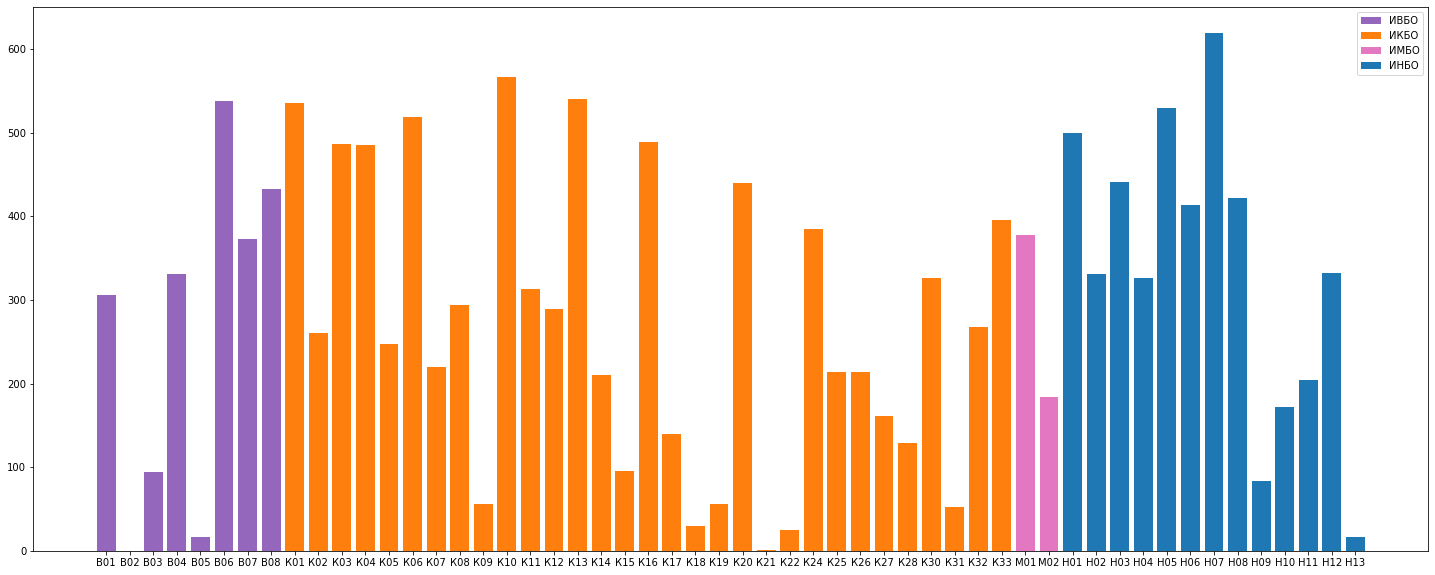

In [15]:
import numpy as np

color = []
fig,ax = plt.subplots(figsize= (25,10))


df = statuses.copy()
for i in range(len(df["task"])):
    df["achievements"].iloc[i] = len(list(filter(None,df["achievements"].iloc[i]
                                                 [1:len(df["achievements"].iloc[i])-1].split(", "))))
group = df.groupby("group").sum()

for cl in group.index:
    if cl[:4]=="ИВБО":
        color.append("tab:purple")
    elif cl[:4]=="ИКБО":
        color.append("tab:orange")
    elif cl[:4]=="ИМБО":
        color.append("tab:pink")
    else:
        color.append("tab:blue")

ax.bar([ind[1]+ind[5:7] for ind in group.index],group["task"],color = color)
legend_elements = [Patch(facecolor='tab:purple',label='ИВБО'),Patch(facecolor='tab:orange',label='ИКБО'),
                  Patch(facecolor='tab:pink',label='ИМБО'),Patch(facecolor='tab:blue',label='ИНБО')]
ax.legend(handles=legend_elements)

# 3.9 Кто находится на первых 10 местах в рейтинге студентов?

In [14]:
df = checks.merge(mesages.rename(columns = {"id":"message_id"})[["group","message_id","variant"]],
                  how = 'left', on = "message_id")
df = df[df["status"]==2].groupby(["group","variant"]).count().nlargest(10,"id")
df["group"] = [group[0] for group in df.index]
df["variant"] = [group[1] for group in df.index]
df.index = range(1,11)
df = df[["group","variant","id"]].rename(columns = {"id":"Количество правильных решений"})
df

,group,variant,Количество правильных решений
1,ИКБО-08-21,5,90
2,ИКБО-03-21,3,79
3,ИНБО-12-21,12,61
4,ИКБО-28-21,17,58
5,ИМБО-02-21,13,56
6,ИНБО-07-21,3,56
7,ИВБО-04-21,21,50
8,ИНБО-02-21,21,48
9,ИНБО-07-21,4,46
10,ИНБО-07-21,11,46


# 3.10 В каких группах студенты чаще решают задачи различными способами?

Text(0.5, 1.0, 'Среднее количество правильных решений учеников')

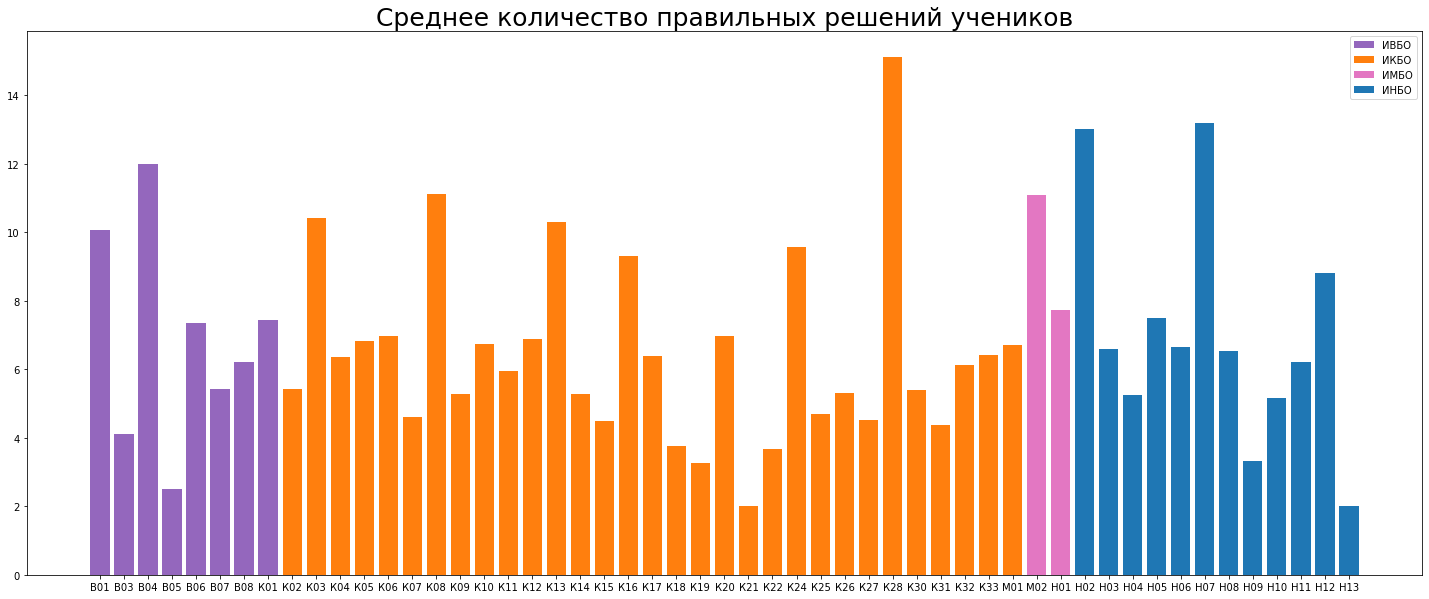

In [33]:
color = []
fig,ax = plt.subplots(figsize= (25,10))

df = checks.merge(mesages.rename(columns = {"id":"message_id"})[["group","message_id","variant"]],
                  how = 'left', on = "message_id")
df = df[df["status"]==2].groupby(["group","variant"]).count()
df = df.groupby("group").mean()

for cl in group.index:
    if cl[:4]=="ИВБО":
        color.append("tab:purple")
    elif cl[:4]=="ИКБО":
        color.append("tab:orange")
    elif cl[:4]=="ИМБО":
        color.append("tab:pink")
    else:
        color.append("tab:blue")

ax.bar([ind[1]+ind[5:7] for ind in df.index],df["id"],color = color)
legend_elements = [Patch(facecolor='tab:purple',label='ИВБО'),Patch(facecolor='tab:orange',label='ИКБО'),
                  Patch(facecolor='tab:pink',label='ИМБО'),Patch(facecolor='tab:blue',label='ИНБО')]
ax.legend(handles=legend_elements)

font1 = {'size':25}
ax.set_title("Среднее количество правильных решений учеников",fontdict=font1)


# 3.11 Какие годы были самыми популярными с точки зрения выхода игр?

In [44]:
games = pd.read_csv("GAMES.csv",sep=";",header = None, names = ["Автор", 'Жанр', 'Файл', 'Год'])

/Users/egormatolygin/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Год', ylabel='count'>

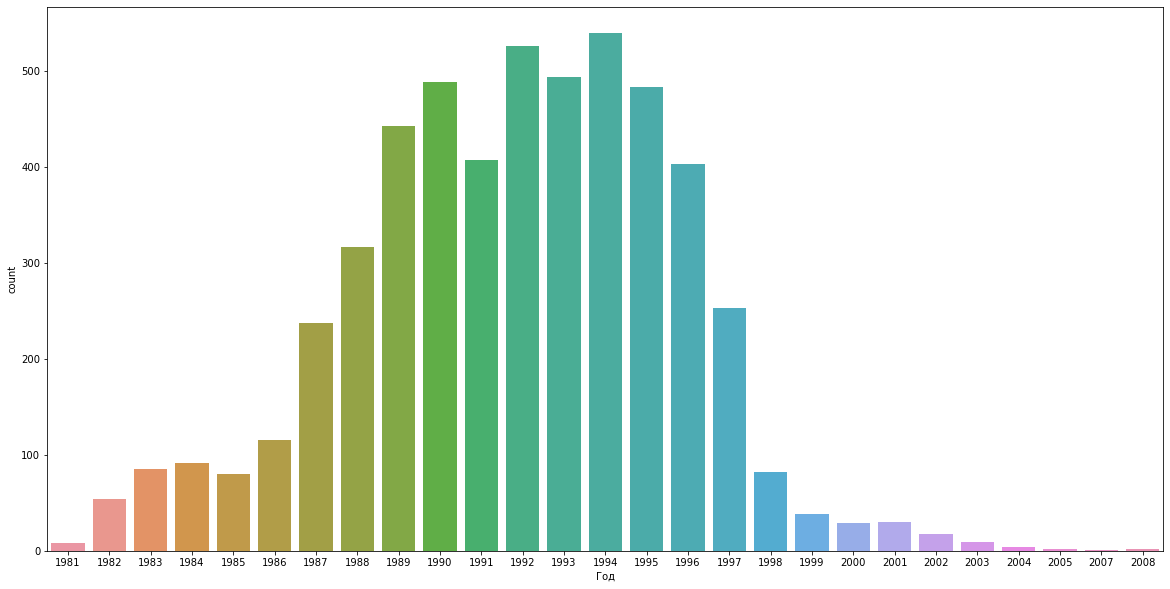

In [46]:
plt.figure(figsize=(20,10))
sns.countplot(games[games["Год"]!="не издана"]["Год"])

# 3.12 Какие жанры были популярны в различные периоды времени?

In [49]:
games["Жанр"].unique()

array(['Arcade', 'Action', 'Simulation', 'Sports', 'Strategy', 'RPG',
       'Adventure', 'Tabletop', 'Racing', 'Educational',
       'Interactive Fiction', 'Quest', 'Puzzle', 'Other', 'Fighting'],
      dtype=object)

<AxesSubplot:xlabel='Год', ylabel='Автор'>

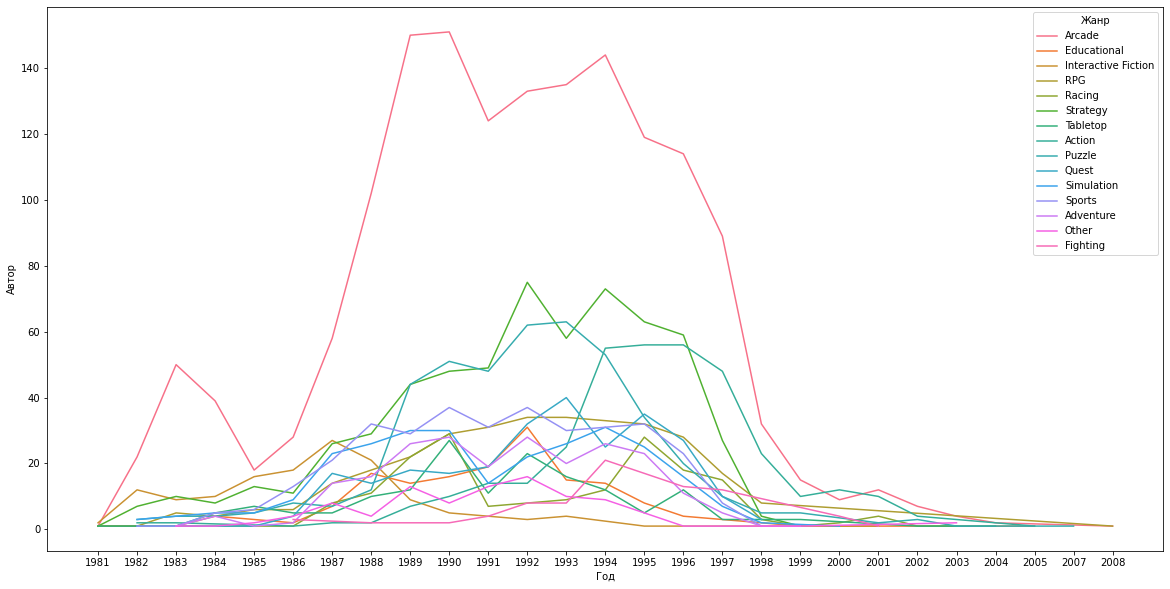

In [144]:
#fig, ax = plt.subplots(figsize = (15,7))
sns.color_palette("tab20")
sns.set_color_codes("bright")
plt.figure(figsize=(20,10))
group = games[games["Год"]!= 'не издана'].groupby(["Год","Жанр"]).count()
group["Жанр"] = [ind[1] for ind in group.index]
group["Год"] = [ind[0] for ind in group.index]

#group.index = group["Год"]
#ax.plot(group[group["Жанр"]=="Action"]["Автор"])
#ax.plot(group[group["Жанр"]=="Arcade"]["Автор"])

sns.lineplot(data = group,x="Год",y = "Автор",hue = "Жанр")

#ax.legend(group["Жанр"].unique()[1:4])